In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## Para visualizar y cargar el dataset. Las credenciales de autenticación desponibles [Aquí](https://www.kaggle.com/settings/account) en la sección API.

In [ ]:
#Cargar el archivo JSON con las credenciales de autenticación de Kaggle utilizando Google Colab.
from google.colab import files
files.upload()

#Instalar la API de Kaggle
!pip install kaggle

#Mover el archivo JSON de autenticación a la ubicación correcta
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Descargar los datos de la competición "Playground Series - S3E20" desde Kaggle
!kaggle competitions download -c playground-series-s3e20

#Descomprimir el archivo ZIP descargado
!unzip playground-series-s3e20.zip

Saving kaggle.json to kaggle.json
playground-series-s3e20.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  playground-series-s3e20.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head(10)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
5,ID_-0.510_29.290_2019_05,-0.51,29.29,2019,5,0.000294,0.871713,0.000242,0.227656,-13.453690,...,5530.354546,49846.001010,4495.301362,7.556143,0.250228,30.128401,37.007020,-137.388719,21.157820,4.310819
6,ID_-0.510_29.290_2019_06,-0.51,29.29,2019,6,-0.000285,0.791956,-0.000226,0.119397,72.198647,...,4378.614648,58804.276563,3537.050659,10.493107,0.240828,4.585368,30.491541,-128.196338,21.721202,4.269334
7,ID_-0.510_29.290_2019_07,-0.51,29.29,2019,7,-0.000016,0.976311,-0.000016,0.106799,-100.956055,...,3468.924146,63697.007267,2597.071563,20.533600,0.250168,16.374829,35.840248,-122.250699,20.432005,4.251361
8,ID_-0.510_29.290_2019_08,-0.51,29.29,2019,8,-0.000115,0.796941,-0.000101,0.164971,-40.179074,...,3160.264670,67222.556159,2530.851476,24.253928,0.260543,-12.021751,42.688789,-114.296369,22.365602,4.281937
9,ID_-0.510_29.290_2019_09,-0.51,29.29,2019,9,0.000056,0.998541,0.000014,0.157726,-100.108744,...,4141.073340,60298.717969,3510.293652,13.813379,0.289295,-66.258392,28.596211,-105.687177,21.084021,4.352933


## Expoloración de las variables

Variable objetivo (emission)

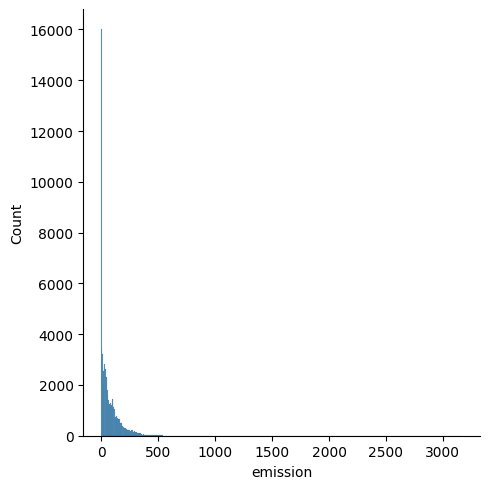

In [ ]:
sns.displot(df['emission'])

In [ ]:
df["emission"].skew()

10.173825825101622

**Interpretación del "Skewness"**

La distribución es asimétrica hacia la derecha (positiva). Esto significa que hay una cola larga en el lado derecho de la distribución, y la mayoría de los valores se encuentran en el lado izquierdo

-----------------------------------------------------------------------------------------------

Histograma con datos dentro de un rango

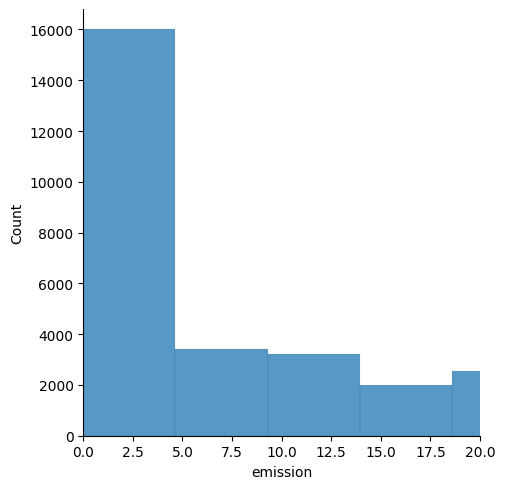

In [ ]:
sns.displot(df['emission'])
plt.xlim(0,20)
plt.show()

Número de datos dentro de un rango

In [ ]:
(df["emission"] < 1000).sum() - (df["emission"] < 500).sum()

316

Diagrama para dos variables

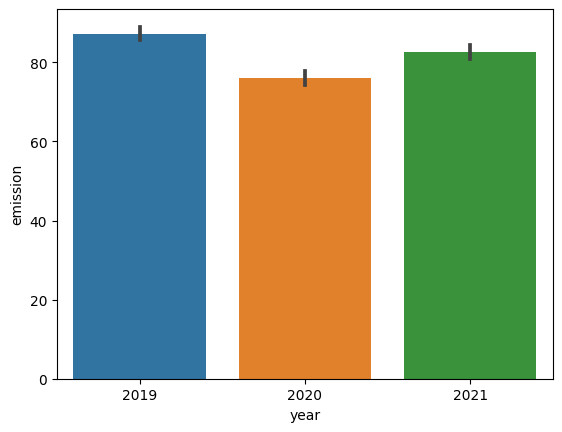

In [ ]:
sns.barplot(x='year', y='emission', data=df)
plt.show()

Distribuciones de cada una de las variables

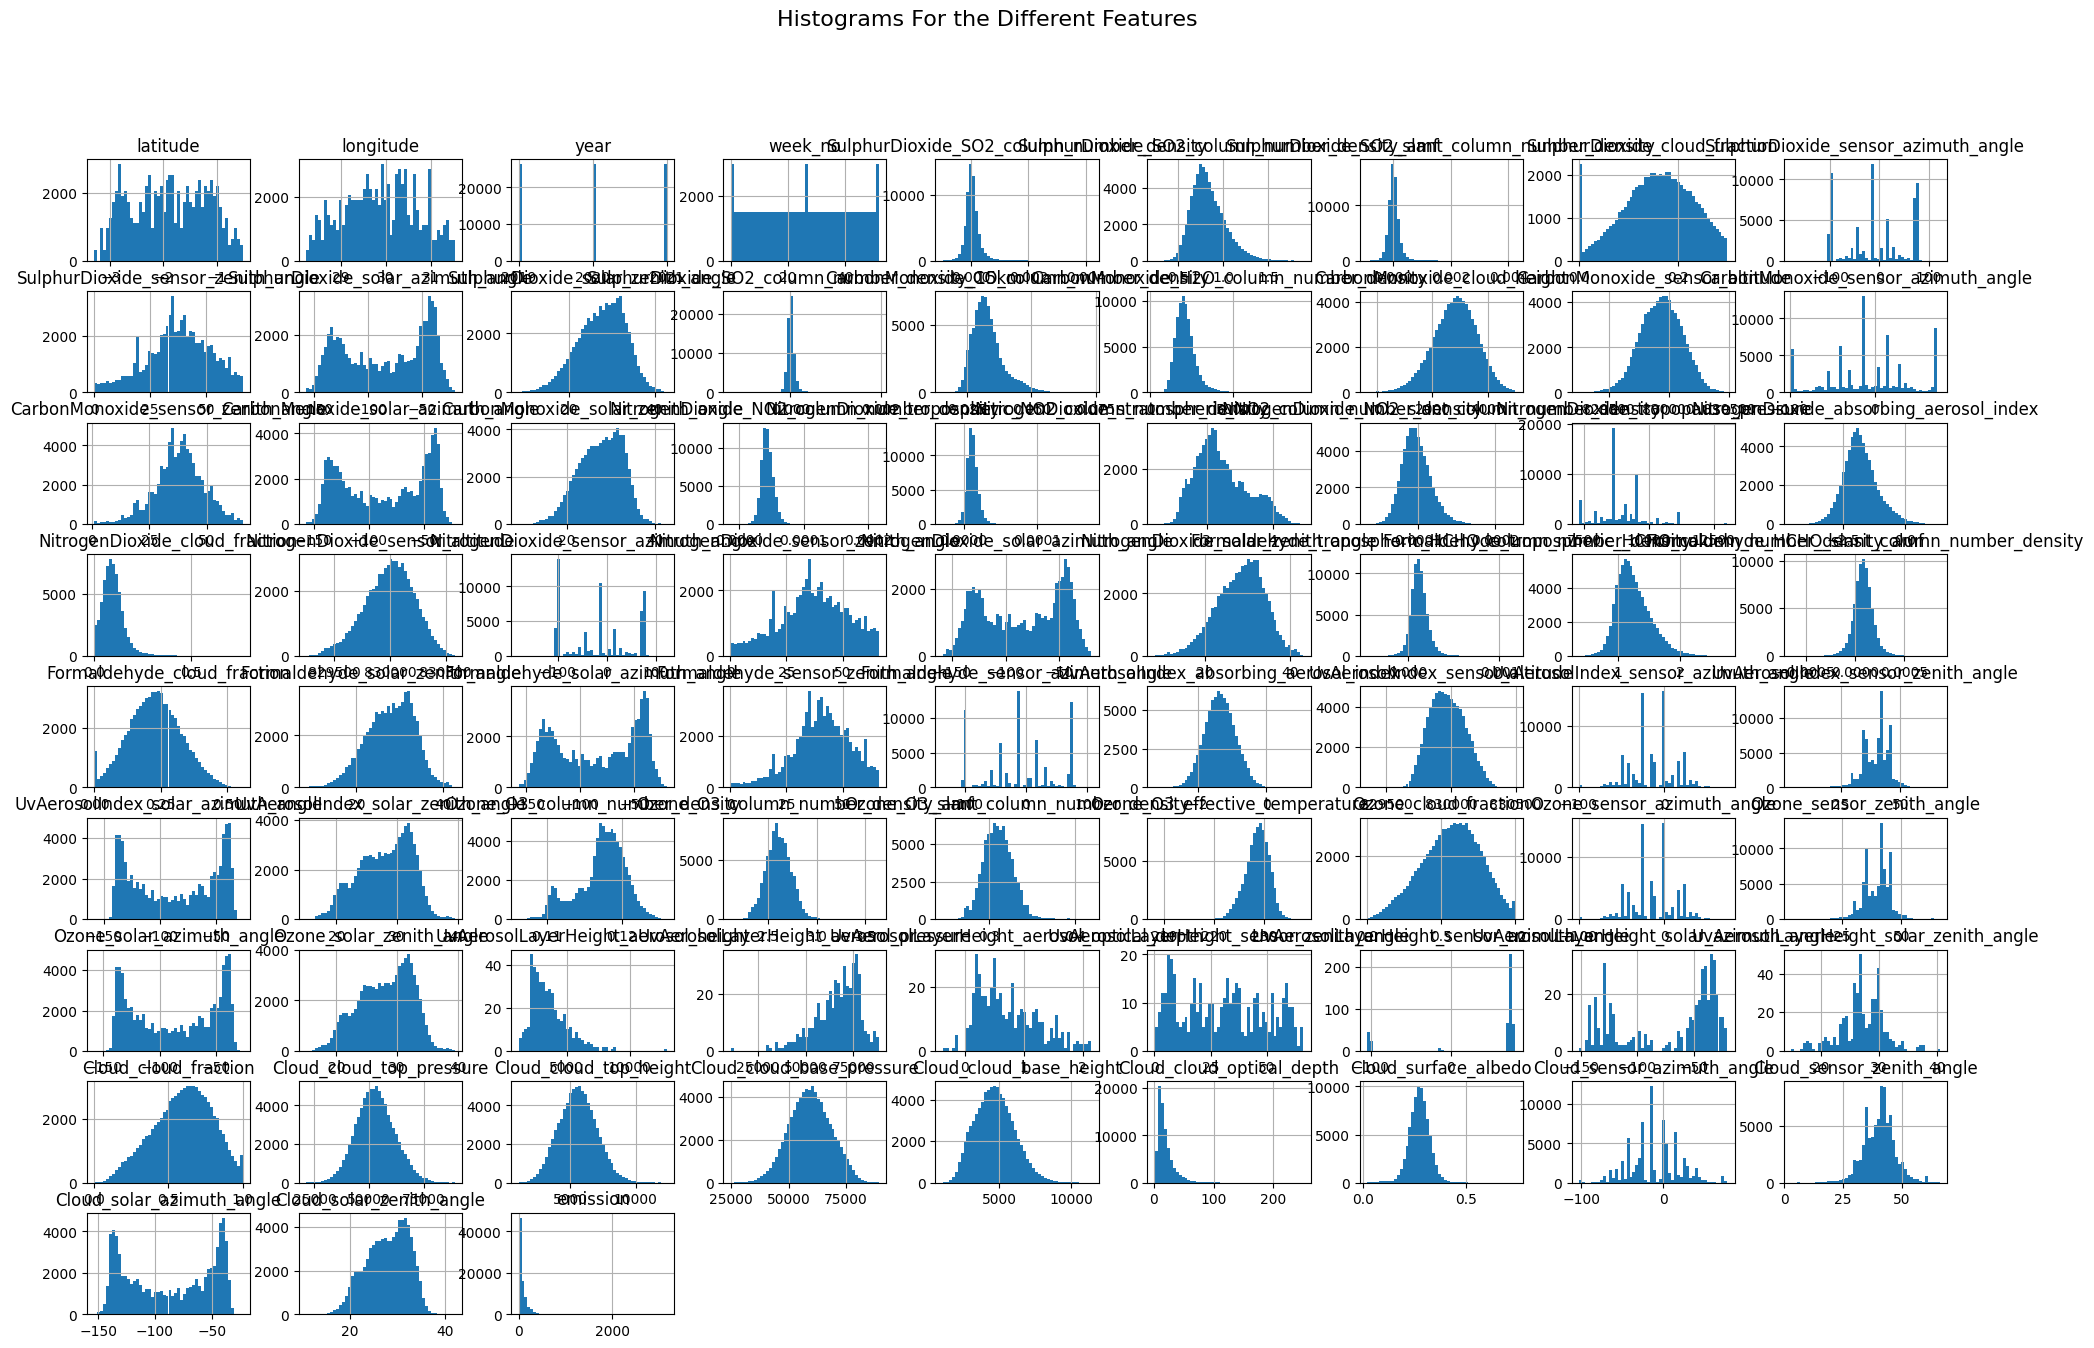

In [ ]:
df.hist(bins=50, figsize=(24,15))
plt.suptitle('Histograms For the Different Features', fontsize=16)

plt.show()

## Correlación entre las variables

In [95]:
corr_matrix = df.corr()

plt.figure(figsize=(68,68))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Porcentaje de datos faltantes en cada columna

In [ ]:
for column in df.columns:
  conteo = df[column].isna().sum()
  print(column,":")
  print(conteo/df.shape[0] * 100, "\n")

In [ ]:
total           = df.isnull().sum().sort_values(ascending=False)
percent         = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_train  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train

## Datos continuos a categóricos

Número de columnas con datos categóricos en el dataset original

In [ ]:
len(df.select_dtypes(include=['object', 'category']).columns)

1

In [ ]:
df_copy = df.copy()

Cambio del tipo de dato al 10% de las columnas (**con fuerza bruta**)

In [ ]:
df_copy["year"] = df_copy["year"].astype("category")
df_copy["week_no"] = df_copy["week_no"].astype("category")
df_copy["Ozone_sensor_azimuth_angle"] = df_copy["Ozone_sensor_azimuth_angle"].astype("category")
df_copy["Ozone_O3_effective_temperature"] = df_copy["Ozone_O3_effective_temperature"].astype("category")
df_copy["UvAerosolIndex_sensor_azimuth_angle"] = df_copy["UvAerosolIndex_sensor_azimuth_angle"].astype("category")
df_copy["Formaldehyde_sensor_zenith_angle"] = df_copy["Formaldehyde_sensor_zenith_angle"].astype("category")
df_copy["Formaldehyde_solar_zenith_angle"] = df_copy["Formaldehyde_solar_zenith_angle"].astype("category")
df_copy["Formaldehyde_HCHO_slant_column_number_density"] = df_copy["Formaldehyde_HCHO_slant_column_number_density"].astype("category")

Cambio del tipo de dato al 10% de las columnas (**aleatoriamente**)

In [ ]:
num_columnas_a_convertir = int((df_copy.shape[1] * 0.1)+1)
columnas_a_convertir = np.random.choice(df_copy.columns, size=num_columnas_a_convertir, replace=False)
df_copy[columnas_a_convertir] = df_copy[columnas_a_convertir].astype('category')

Listar el tipo de dato de todas las columnas

In [ ]:
for column in df_copy.columns:
  print(df_copy[column].dtype)

object
float64
float64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
category
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
category
float64
category
float64
float64
float64
float64
float64
category
float64
float64
float64
float64
float64
float64
float64
float64
float64
category
category
category
float64
float64
float64
float64
category
float64
float64


Porcentaje de columnas de tipo 'category'

In [ ]:
(len(df_copy.select_dtypes(include=['category']).columns)/df_copy.shape[1]) * 100

10.526315789473683